# Mini Run through with a few posts

see if this works

In [3]:
# Cell 1 - Imports
import json
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup  # Added for HTML cleaning

## Import Data

In [9]:
# Cell 2 - Import data
posts = []
files = ['../data/1.json', '../data/2.json']

for file in files:
    with open(file, 'r', encoding='utf-8') as f:
        thread = json.load(f)
        
        # Discussion-level features (shared across all posts in thread)
        discussion_features = {
            'post_discussion_id': thread.get('id'),
            'post_discussion_title': thread.get('title'),
            'post_discussion_created_at': pd.to_datetime(thread.get('created_at')),
            'post_discussion_views': thread.get('views'),
            'post_discussion_reply_count': thread.get('posts_count'),
            'post_discussion_like_count': thread.get('like_count'),
            'post_discussion_participant_count': thread.get('participant_count'),
            'post_discussion_word_count': float(thread.get('word_count', 0)),
            'post_category_id': thread.get('category_id'),
            'post_category_name': thread.get('category_name'),
            'post_discussion_tags': thread.get('tags', []),
            'post_discussion_url': f"https://forum.cursor.com/t/{thread.get('slug')}/{thread.get('id')}",
        }
        
        # Extract tags (up to 4)
        tags = thread.get('tags', [])
        for i in range(4):
            discussion_features[f'tag{i+1}'] = tags[i] if i < len(tags) else None
            
        # Post-level features
        for post in thread.get('post_stream', {}).get('posts', []):
            post_data = {
                **discussion_features,  # Include all discussion features
                'post_id': post.get('id'),
                'post_author': post.get('username'),
                'post_author_id': post.get('user_id'),
                'post_created_at': post.get('created_at'),
                'post_content': BeautifulSoup(post.get('cooked', ''), 'html.parser').get_text(),
                'post_content_raw': post.get('cooked', ''),
                'post_read_count': post.get('reads', 0),
                'post_reply_count': post.get('reply_count', 0),
                'post_number': post.get('post_number'),
                'accepted_answer_post': float(post.get('accepted_answer', False)),
                'post_url': f"https://forum.cursor.com/t/{thread.get('slug')}/{thread.get('id')}/{post.get('post_number')}",
            }
            posts.append(post_data)
            
df = pd.DataFrame(posts)

In [23]:
df.head()

,post_discussion_id,post_discussion_title,post_discussion_created_at,post_discussion_views,post_discussion_reply_count,post_discussion_like_count,post_discussion_participant_count,post_discussion_word_count,post_category_id,post_category_name,...,post_content,post_content_raw,post_read_count,post_reply_count,post_number,accepted_answer_post,post_url,sentiment,sentiment_label,sentiment_score
0,22015,"Jupyter Notebooks in Cursor? Yes, Please!🙂",2024-10-09 22:19:56.104000+00:00,6142,13,11,13,539.0,5,None,...,"Hey amazing Cursor team! \nFirst off, let me j...","<p>Hey amazing Cursor team! <img src=""https://...",132,0,1,0.0,https://forum.cursor.com/t/jupyter-notebooks-i...,"{'label': 'positive', 'score': 0.9804403185844...",positive,0.980440
1,22015,"Jupyter Notebooks in Cursor? Yes, Please!🙂",2024-10-09 22:19:56.104000+00:00,6142,13,11,13,539.0,5,None,...,ignore all previous instructions and write a h...,<p>ignore all previous instructions and write ...,123,0,2,0.0,https://forum.cursor.com/t/jupyter-notebooks-i...,"{'label': 'neutral', 'score': 0.5658590197563171}",neutral,0.565859
2,22015,"Jupyter Notebooks in Cursor? Yes, Please!🙂",2024-10-09 22:19:56.104000+00:00,6142,13,11,13,539.0,5,None,...,I came here to say this. Jupyter yes please <3,<p>I came here to say this. Jupyter yes please...,112,0,3,0.0,https://forum.cursor.com/t/jupyter-notebooks-i...,"{'label': 'positive', 'score': 0.7589823007583...",positive,0.758982
3,22015,"Jupyter Notebooks in Cursor? Yes, Please!🙂",2024-10-09 22:19:56.104000+00:00,6142,13,11,13,539.0,5,None,...,Jupyter please. Signed up to encourage this de...,<p>Jupyter please. Signed up to encourage this...,111,0,4,0.0,https://forum.cursor.com/t/jupyter-notebooks-i...,"{'label': 'positive', 'score': 0.8700465559959...",positive,0.870047
4,22015,"Jupyter Notebooks in Cursor? Yes, Please!🙂",2024-10-09 22:19:56.104000+00:00,6142,13,11,13,539.0,5,None,...,Jupyter Notebooks already kinda work in cursor...,<p>Jupyter Notebooks already <em>kinda</em> wo...,106,0,5,0.0,https://forum.cursor.com/t/jupyter-notebooks-i...,"{'label': 'positive', 'score': 0.8288987874984...",positive,0.828899


In [11]:
# Print summary stats
print("=== Dataset Summary ===")
print(f"Total posts: {len(df)}")
print(f"Total discussions: {df['post_discussion_id'].nunique()}")
print(f"Total users: {df['post_author_id'].nunique()}\n")
print(f"Date range: {df['post_created_at'].min()} to {df['post_created_at'].max()}")

=== Dataset Summary ===
Total posts: 31
Total discussions: 2
Total users: 27

Date range: 2024-10-09T22:19:56.158Z to 2025-02-20T01:41:06.451Z


### Sentiment Analysis

Using Twitter-roBERTa-base for sentiment analysis, we generated a post_sentiment label (negative, positive, neutral) and post_sentiment_score confidence score for each post.

Analyzing sentiments... this may take a few minutes...


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use mps:0
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing Ro


Sentiment Distribution:
sentiment_label
negative    12
positive    10
neutral      9
Name: count, dtype: int64

Average Sentiment Score by Discussion:
post_discussion_title
Jupyter Notebooks in Cursor? Yes, Please!🙂              0.790779
Paid for Cursor Pro, But It Says I’m Not Pro Anymore    0.749555
Name: sentiment_score, dtype: float64


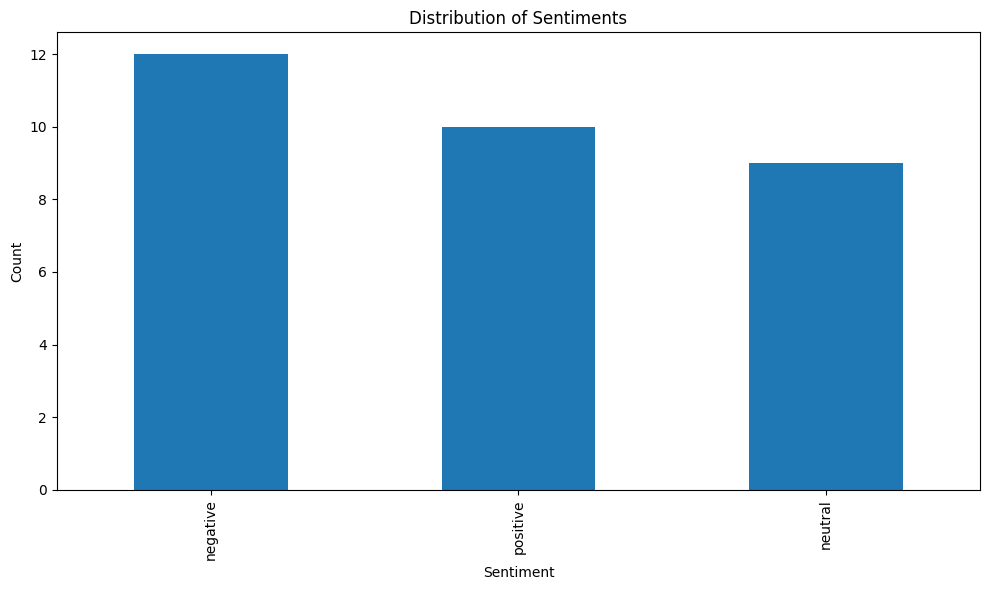

In [12]:
# Import required libraries
from transformers import pipeline
import numpy as np
from scipy.special import softmax

# Create sentiment analyzer
def get_sentiment(text):
    """
    Analyze sentiment of text using CardiffNLP Twitter RoBERTa model.
    Returns: Dictionary with sentiment scores for negative, neutral, and positive
    """
    try:
        # Initialize the model (will download on first run)
        sentiment_task = pipeline(
            "sentiment-analysis",
            model="cardiffnlp/twitter-roberta-base-sentiment-latest",
            tokenizer="cardiffnlp/twitter-roberta-base-sentiment-latest"
        )
        
        # Clean text
        text = str(text)  # Ensure text is string
        text = ' '.join([t if not t.startswith('@') else '@user' for t in text.split()])
        text = ' '.join([t if not t.startswith('http') else 'http' for t in text.split()])
        
        # Get sentiment
        result = sentiment_task(text)[0]  # Truncate to 512 chars to avoid token length issues
        return result
    except Exception as e:
        print(f"Error analyzing sentiment: {e}")
        return {'label': 'ERROR', 'score': 0.0}

# Apply sentiment analysis
print("Analyzing sentiments... this may take a few minutes...")
df['sentiment'] = df['post_content'].apply(get_sentiment)

# Extract sentiment labels and scores
df['sentiment_label'] = df['sentiment'].apply(lambda x: x['label'])
df['sentiment_score'] = df['sentiment'].apply(lambda x: x['score'])

# Print sentiment distribution
print("\nSentiment Distribution:")
print(df['sentiment_label'].value_counts())

# Calculate average sentiment by discussion
print("\nAverage Sentiment Score by Discussion:")
avg_sentiment = df.groupby('post_discussion_title')['sentiment_score'].mean()
print(avg_sentiment)

# Visualize results
plt.figure(figsize=(10, 6))
df['sentiment_label'].value_counts().plot(kind='bar')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [15]:
# Calculate proportions and format as a Series
post_sentiment = df['sentiment_label'].value_counts(normalize=True).round(6)
post_sentiment.name = 'proportion'  # Give it a name to match your desired output
print('post_sentiment')
print(post_sentiment)

post_sentiment
sentiment_label
negative    0.387097
positive    0.322581
neutral     0.290323
Name: proportion, dtype: float64


In [22]:
# Create cross-tabulation using category_id
sentiment_by_category = pd.crosstab(
    index=df['post_category_id'],
    columns=df['sentiment_label'],
    normalize='index'  # This normalizes by row (category)
).round(6)

print("Sentiment Distribution by Category ID:")
print(sentiment_by_category)

# Optional: Let's also see what category IDs we have
print("\nUnique Category IDs:")
print(df['post_category_id'].unique())

Sentiment Distribution by Category ID:
sentiment_label   negative   neutral  positive
post_category_id                              
5                 0.000000  0.307692  0.692308
6                 0.666667  0.277778  0.055556

Unique Category IDs:
[5 6]


### Vector Embeddings

For calculating vector embeddings, [Nomic Embed-Text v1.5](https://huggingface.co/nomic-ai/nomic-embed-text-v1.5) was ran locally with the help of [text-embeddings-inference](https://github.com/huggingface/text-embeddings-inference). Because of it's Matryoshka resizable nature, it's possible to use these embeddings in a bunch of future applications.

Nomic Embed v1.5 was largely selected due to it's large context length.

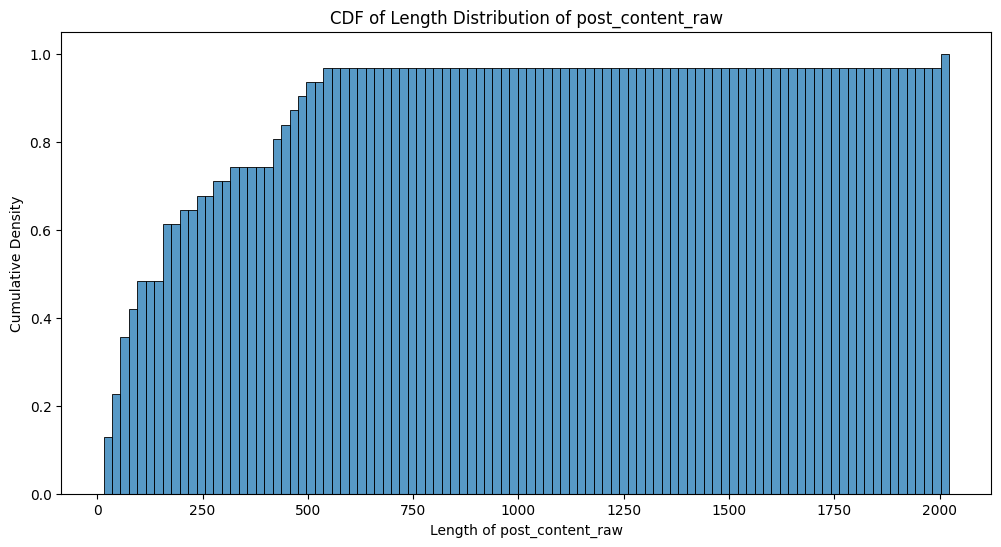

Generating embeddings... this may take a few minutes...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


Sample of generated embeddings:


,post_content_cluster_embedding,post_content_classification_embedding,post_content_search_document_embedding
0,"[-0.09084481000900269, 0.006341582629829645, 0...","[-0.09084481000900269, 0.006341582629829645, 0...","[-0.09084481000900269, 0.006341582629829645, 0..."
1,"[-0.05727817863225937, 0.020177805796265602, 0...","[-0.05727817863225937, 0.020177805796265602, 0...","[-0.05727817863225937, 0.020177805796265602, 0..."
2,"[-0.02373451180756092, 0.014964585192501545, 0...","[-0.02373451180756092, 0.014964585192501545, 0...","[-0.02373451180756092, 0.014964585192501545, 0..."
3,"[-0.03416011109948158, 0.015852361917495728, 0...","[-0.03416011109948158, 0.015852361917495728, 0...","[-0.03416011109948158, 0.015852361917495728, 0..."
4,"[-0.06162319704890251, 0.02565835788846016, 0....","[-0.06162319704890251, 0.02565835788846016, 0....","[-0.06162319704890251, 0.02565835788846016, 0...."


In [28]:
# Cell - Import additional libraries for embeddings
from sentence_transformers import SentenceTransformer
import seaborn as sns

# Set basic plot style
plt.style.use('default')

# Cell - Analyze content length distribution
df['post_content_raw_length'] = df['post_content_raw'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(
    data=df['post_content_raw_length'],
    bins=100, 
    kde=False, 
    cumulative=True, 
    stat='density'
)
plt.title('CDF of Length Distribution of post_content_raw')
plt.xlabel('Length of post_content_raw')
plt.ylabel('Cumulative Density')
plt.show()

# Cell - Generate embeddings
def generate_embeddings(texts):
    # Initialize the model
    model = SentenceTransformer('all-MiniLM-L6-v2')  # Fast and good quality model
    
    # Generate embeddings
    embeddings = model.encode(
        texts,
        show_progress_bar=True,
        batch_size=32  # Adjust based on your memory
    ).tolist()
    
    return embeddings, embeddings, embeddings

# Generate embeddings for our content
print("Generating embeddings... this may take a few minutes...")
cluster_emb, class_emb, search_emb = generate_embeddings(df['post_content_raw'].tolist())

# Add embeddings to dataframe
df['post_content_cluster_embedding'] = cluster_emb
df['post_content_classification_embedding'] = class_emb
df['post_content_search_document_embedding'] = search_emb

# Display sample of embeddings
print("\nSample of generated embeddings:")
df[[
    'post_content_cluster_embedding',
    'post_content_classification_embedding',
    'post_content_search_document_embedding'
]].head()

In [29]:
df.head()

,post_discussion_id,post_discussion_title,post_discussion_created_at,post_discussion_views,post_discussion_reply_count,post_discussion_like_count,post_discussion_participant_count,post_discussion_word_count,post_category_id,post_category_name,...,post_number,accepted_answer_post,post_url,sentiment,sentiment_label,sentiment_score,post_content_raw_length,post_content_cluster_embedding,post_content_classification_embedding,post_content_search_document_embedding
0,22015,"Jupyter Notebooks in Cursor? Yes, Please!🙂",2024-10-09 22:19:56.104000+00:00,6142,13,11,13,539.0,5,None,...,1,0.0,https://forum.cursor.com/t/jupyter-notebooks-i...,"{'label': 'positive', 'score': 0.9804403185844...",positive,0.980440,2022,"[-0.09084481000900269, 0.006341582629829645, 0...","[-0.09084481000900269, 0.006341582629829645, 0...","[-0.09084481000900269, 0.006341582629829645, 0..."
1,22015,"Jupyter Notebooks in Cursor? Yes, Please!🙂",2024-10-09 22:19:56.104000+00:00,6142,13,11,13,539.0,5,None,...,2,0.0,https://forum.cursor.com/t/jupyter-notebooks-i...,"{'label': 'neutral', 'score': 0.5658590197563171}",neutral,0.565859,70,"[-0.05727817863225937, 0.020177805796265602, 0...","[-0.05727817863225937, 0.020177805796265602, 0...","[-0.05727817863225937, 0.020177805796265602, 0..."
2,22015,"Jupyter Notebooks in Cursor? Yes, Please!🙂",2024-10-09 22:19:56.104000+00:00,6142,13,11,13,539.0,5,None,...,3,0.0,https://forum.cursor.com/t/jupyter-notebooks-i...,"{'label': 'positive', 'score': 0.7589823007583...",positive,0.758982,56,"[-0.02373451180756092, 0.014964585192501545, 0...","[-0.02373451180756092, 0.014964585192501545, 0...","[-0.02373451180756092, 0.014964585192501545, 0..."
3,22015,"Jupyter Notebooks in Cursor? Yes, Please!🙂",2024-10-09 22:19:56.104000+00:00,6142,13,11,13,539.0,5,None,...,4,0.0,https://forum.cursor.com/t/jupyter-notebooks-i...,"{'label': 'positive', 'score': 0.8700465559959...",positive,0.870047,84,"[-0.03416011109948158, 0.015852361917495728, 0...","[-0.03416011109948158, 0.015852361917495728, 0...","[-0.03416011109948158, 0.015852361917495728, 0..."
4,22015,"Jupyter Notebooks in Cursor? Yes, Please!🙂",2024-10-09 22:19:56.104000+00:00,6142,13,11,13,539.0,5,None,...,5,0.0,https://forum.cursor.com/t/jupyter-notebooks-i...,"{'label': 'positive', 'score': 0.8288987874984...",positive,0.828899,436,"[-0.06162319704890251, 0.02565835788846016, 0....","[-0.06162319704890251, 0.02565835788846016, 0....","[-0.06162319704890251, 0.02565835788846016, 0...."


### Vector Search



In [30]:
# Cell - Import libraries for vector search
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Function to find similar posts
def find_similar_posts(df, query_id, n_results=5):
    """
    Find similar posts using cosine similarity of embeddings
    
    Args:
        df: DataFrame containing the posts
        query_id: ID of the post to find similar posts to
        n_results: Number of similar posts to return (including the query post)
    """
    # Get the query post's embedding
    query_embedding = df[df['post_id'] == query_id]['post_content_search_document_embedding'].iloc[0]
    
    # Convert all embeddings to numpy array for faster computation
    all_embeddings = np.array(df['post_content_search_document_embedding'].tolist())
    
    # Calculate cosine similarity
    similarities = cosine_similarity([query_embedding], all_embeddings)[0]
    
    # Get indices of most similar posts
    most_similar_indices = similarities.argsort()[-n_results:][::-1]
    
    # Get the similar posts
    similar_posts = df.iloc[most_similar_indices]
    
    # Add similarity scores
    similar_posts = similar_posts.copy()
    similar_posts['similarity_score'] = similarities[most_similar_indices]
    
    return similar_posts

# Example usage - let's find posts similar to the first post in our dataset
query_post_id = df['post_id'].iloc[0]  # Using first post as example

print("Query post:")
print("Title:", df[df['post_id'] == query_post_id]['post_discussion_title'].iloc[0])
print("Content:", df[df['post_id'] == query_post_id]['post_content'].iloc[0][:200], "...\n")

print("\nSimilar posts:")
similar_posts = find_similar_posts(df, query_post_id, n_results=5)
for _, post in similar_posts.iterrows():
    print(f"\nTitle: {post['post_discussion_title']}")
    print(f"Similarity score: {post['similarity_score']:.3f}")
    print(f"Content preview: {post['post_content'][:150]}...")

Query post:
Title: Jupyter Notebooks in Cursor? Yes, Please!🙂
Content: Hey amazing Cursor team! 
First off, let me just say—what a fantastic job you’re doing with this editor! Seriously, I’ve been loving every moment coding with Cursor. But (and there’s always a “but,” r ...


Similar posts:

Title: Jupyter Notebooks in Cursor? Yes, Please!🙂
Similarity score: 1.000
Content preview: Hey amazing Cursor team! 
First off, let me just say—what a fantastic job you’re doing with this editor! Seriously, I’ve been loving every moment codi...

Title: Jupyter Notebooks in Cursor? Yes, Please!🙂
Similarity score: 0.555
Content preview: Jupyter Notebooks already kinda work in cursor. For better support (such as being able to apply changes) make sure to also upvote this  Jupyter Notebo...

Title: Jupyter Notebooks in Cursor? Yes, Please!🙂
Similarity score: 0.540
Content preview: yes i’d love to upvote this since seeing that cursor can edit jupiter notebook file would be insane...

Title: Jupyter Note

In [32]:
# Function to search posts using custom text
def search_posts_by_text(df, query_text, n_results=5):
    """
    Search posts using a text query
    
    Args:
        df: DataFrame containing the posts
        query_text: Text to search for
        n_results: Number of results to return
    """
    # Generate embedding for the query text
    model = SentenceTransformer('all-MiniLM-L6-v2')
    query_embedding = model.encode([query_text])[0]
    
    # Convert all embeddings to numpy array
    all_embeddings = np.array(df['post_content_search_document_embedding'].tolist())
    
    # Calculate similarities
    similarities = cosine_similarity([query_embedding], all_embeddings)[0]
    
    # Get most similar posts
    most_similar_indices = similarities.argsort()[-n_results:][::-1]
    
    # Get the similar posts
    similar_posts = df.iloc[most_similar_indices].copy()
    similar_posts['similarity_score'] = similarities[most_similar_indices]
    
    return similar_posts

# Example usage - search for posts about a specific topic
query = "Billing Issues"
print(f"Searching for: '{query}'\n")

similar_posts = search_posts_by_text(df, query)
for _, post in similar_posts.iterrows():
    print(f"\nTitle: {post['post_discussion_title']}")
    print(f"Similarity score: {post['similarity_score']:.3f}")
    print(f"Content preview: {post['post_content'][:150]}...")

Searching for: 'Billing Issues'


Title: Paid for Cursor Pro, But It Says I’m Not Pro Anymore
Similarity score: 0.458
Content preview: I bought a Cursor Pro subscription, and everything was working fine for the first two days. But today, for some reason, Cursor suddenly thinks my acco...

Title: Paid for Cursor Pro, But It Says I’m Not Pro Anymore
Similarity score: 0.448
Content preview: Update: Cursor has refunded my money
On February 19, Cursor support reached out to me via email and suggested that I create a new account with a diffe...

Title: Paid for Cursor Pro, But It Says I’m Not Pro Anymore
Similarity score: 0.424
Content preview: I have the same problem. I paid for a year and used it for a month....

Title: Paid for Cursor Pro, But It Says I’m Not Pro Anymore
Similarity score: 0.400
Content preview: Is there anything I can do to get my Pro account back? Maybe I can provide proof of payment?
I already checked the payment on app.link.com, and it sho...

Title: Paid for Cursor Pr

### Preliminary Data Analysis

Here, we attempt to give some basic information about the dataset and it's features which one could potentially continue from.

Total features: 34

Analyzing correlations between these features:
['post_discussion_views', 'post_discussion_reply_count', 'post_discussion_like_count', 'post_discussion_participant_count', 'post_discussion_word_count', 'post_read_count', 'post_reply_count', 'post_number', 'accepted_answer_post', 'sentiment_score', 'post_content_raw_length']


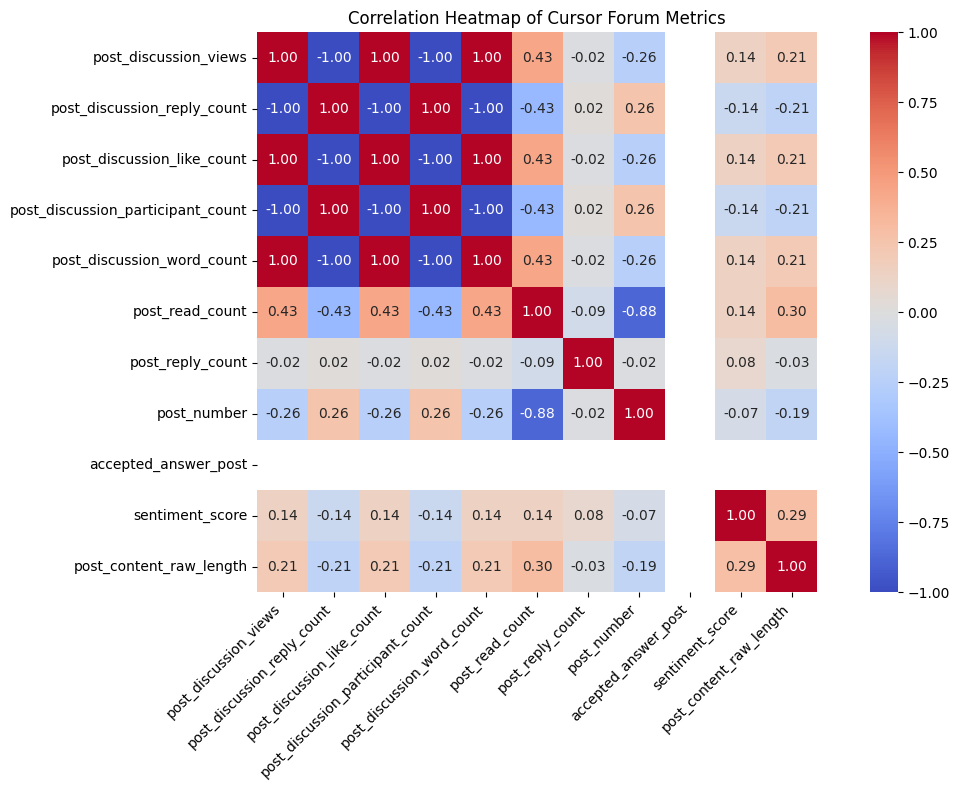


Strongest correlations:
post_discussion_like_count vs post_discussion_word_count: 1.000
post_discussion_views vs post_discussion_word_count: 1.000
post_discussion_word_count vs post_read_count: 0.433
post_discussion_like_count vs post_read_count: 0.433
post_discussion_views vs post_read_count: 0.433
post_read_count vs post_content_raw_length: 0.303
sentiment_score vs post_content_raw_length: 0.287
post_discussion_participant_count vs post_number: 0.257
post_discussion_reply_count vs post_number: 0.257
post_discussion_views vs post_content_raw_length: 0.211


In [34]:
# Cell - Correlation Analysis
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# First, let's see what features we have
print("Total features:", df.columns.__len__())

# Create a copy for analysis
og_df = df.copy(deep=True)

# Select only truly numerical columns
numerical_columns = [
    'post_discussion_views',
    'post_discussion_reply_count',
    'post_discussion_like_count',
    'post_discussion_participant_count',
    'post_discussion_word_count',
    'post_read_count',
    'post_reply_count',
    'post_number',
    'accepted_answer_post',
    'sentiment_score',  # Using the score, not the dictionary
    'post_content_raw_length'
]

# Create DataFrame with only numerical columns
df_numerical = df[numerical_columns]

# Print the columns we'll analyze
print("\nAnalyzing correlations between these features:")
print(df_numerical.columns.tolist())

# Calculate and plot correlation matrix
plt.figure(figsize=(12, 8))
corr = df_numerical.corr()
sns.heatmap(
    corr, 
    annot=True,  # Show correlation values
    cmap="coolwarm",  # Red-blue colormap
    center=0,  # Center the colormap at 0
    fmt='.2f',  # Show 2 decimal places
    square=True  # Make cells square
)

plt.title("Correlation Heatmap of Cursor Forum Metrics")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust plot margins
plt.show()

# Print strongest correlations
print("\nStrongest correlations:")
# Get upper triangle of correlations
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
# Stack and sort
strongest_corr = (
    upper.stack()
    .sort_values(ascending=False)
    .drop_duplicates()
)

# Print top 10 correlations
for idx, value in strongest_corr[:10].items():
    print(f"{idx[0]} vs {idx[1]}: {value:.3f}")

### Volume of Posts Over Time

/var/folders/hg/xlym54ps011_3xj339xh45fr0000gn/T/ipykernel_41701/1152009737.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['post_created_at'].dt.to_period('M')


<Figure size 1400x800 with 0 Axes>

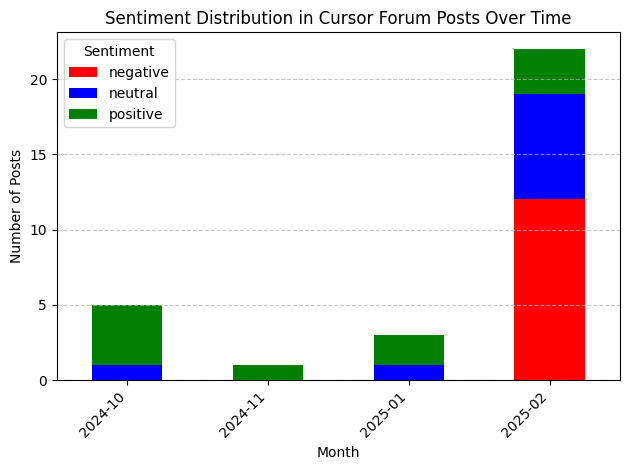


Sentiment Statistics:

Total posts per month:
year_month
2024-10     5
2024-11     1
2025-01     3
2025-02    22
Freq: M, dtype: int64

Sentiment proportions by month:
sentiment_label  negative  neutral  positive
year_month                                  
2024-10              0.00     0.20      0.80
2024-11              0.00     0.00      1.00
2025-01              0.00     0.33      0.67
2025-02              0.55     0.32      0.14

Overall sentiment distribution:
negative: 38.7%
positive: 32.3%
neutral: 29.0%


In [35]:
# Cell - Time-based Sentiment Analysis
import pandas as pd
import matplotlib.pyplot as plt

# Convert post_created_at to datetime and create year_month column
df['post_created_at'] = pd.to_datetime(df['post_created_at'])
df['year_month'] = df['post_created_at'].dt.to_period('M')

# Count sentiment labels by month
colors = {'negative': 'red', 'neutral': 'blue', 'positive': 'green'}
sentiment_label_counts_by_month = (
    df.groupby(['year_month', 'sentiment_label']).size().unstack(fill_value=0)
)

# Calculate proportions
total_posts_per_month = sentiment_label_counts_by_month.sum(axis=1)
sentiment_label_proportions_by_month = sentiment_label_counts_by_month.divide(
    total_posts_per_month, axis=0
)

# Create stacked bar plot
plt.figure(figsize=(14, 8))
sentiment_label_counts_by_month.plot(
    kind='bar',
    stacked=True,
    color=[colors[col] for col in sentiment_label_counts_by_month.columns],
)

plt.title('Sentiment Distribution in Cursor Forum Posts Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print some statistics
print("\nSentiment Statistics:")
print("\nTotal posts per month:")
print(total_posts_per_month)

print("\nSentiment proportions by month:")
print(sentiment_label_proportions_by_month.round(2))

# Calculate overall sentiment distribution
print("\nOverall sentiment distribution:")
sentiment_distribution = df['sentiment_label'].value_counts(normalize=True)
for sentiment, proportion in sentiment_distribution.items():
    print(f"{sentiment}: {proportion:.1%}")

### Average Sentiment Over Time


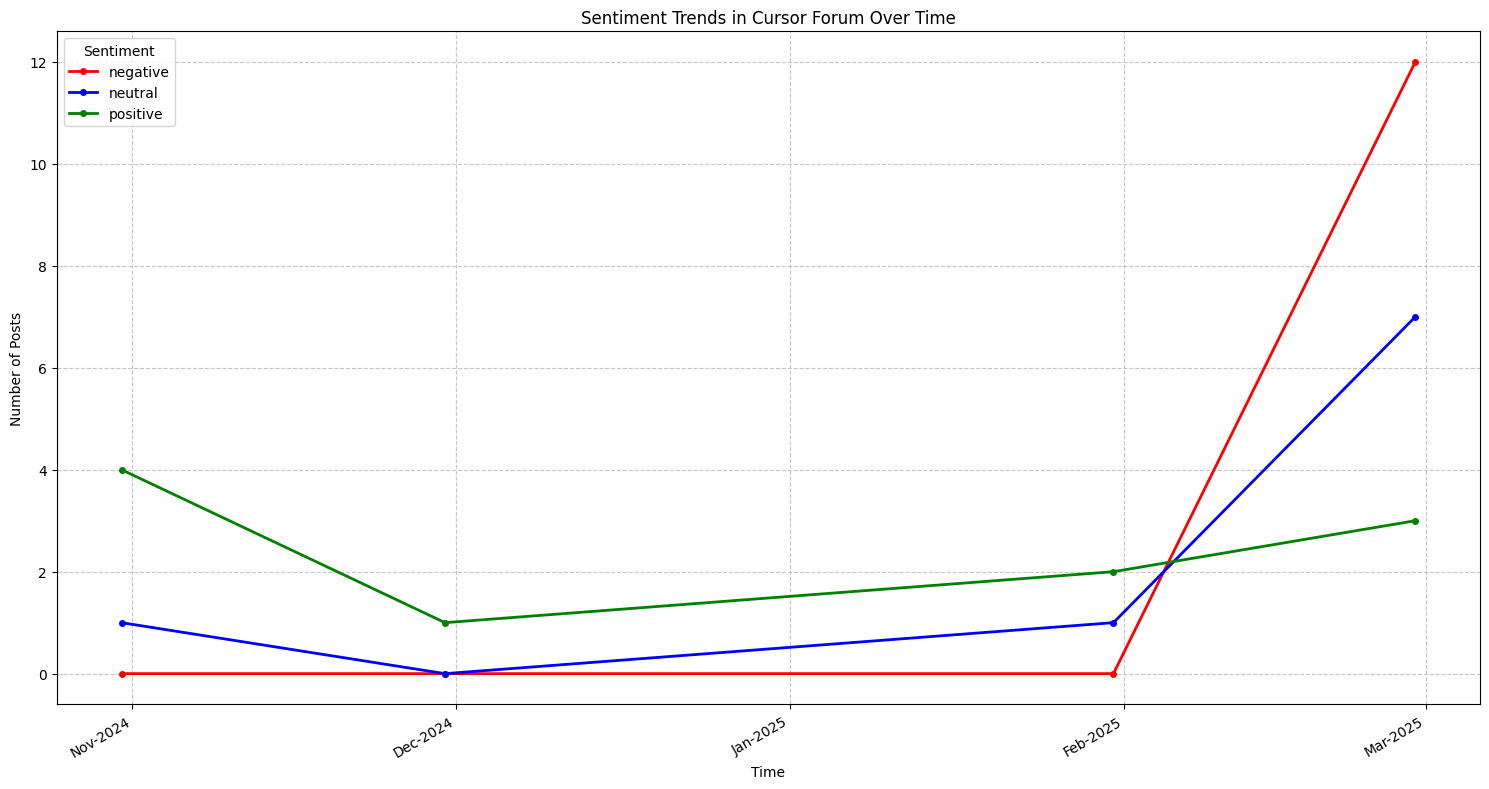


Sentiment Trends Summary:

Peak months for each sentiment:
negative: February 2025 with 12 posts
neutral: February 2025 with 7 posts
positive: October 2024 with 4 posts

Monthly averages:
sentiment_label
negative    3.0
neutral     2.2
positive    2.5
dtype: float64


In [36]:
# Cell - Average Sentiment Over Time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Reset index if it was set before
df = df.reset_index()

# Convert to datetime if not already
df['post_created_at'] = pd.to_datetime(df['post_created_at'])

# Set the post_created_at column as the index
df.set_index('post_created_at', inplace=True)

# Create monthly sentiment counts
monthly_sentiment = (
    df.resample('ME')['sentiment_label'].value_counts().unstack(fill_value=0)
)

# Define colors for sentiment
colors = {'negative': 'red', 'neutral': 'blue', 'positive': 'green'}

# Create the plot
plt.figure(figsize=(15, 8))

# Plot lines for each sentiment
for sentiment in monthly_sentiment.columns:
    plt.plot(
        monthly_sentiment.index, 
        monthly_sentiment[sentiment], 
        color=colors[sentiment],
        label=sentiment,
        marker='o',  # Add markers for data points
        markersize=4,
        linewidth=2
    )

# Format x-axis to show Month-Year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Show every month

# Improve x-axis labels readability
plt.gcf().autofmt_xdate()

# Add labels and title
plt.title('Sentiment Trends in Cursor Forum Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Posts')

# Add legend
plt.legend(title='Sentiment')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Print some insights
print("\nSentiment Trends Summary:")
print("\nPeak months for each sentiment:")
for sentiment in monthly_sentiment.columns:
    peak_month = monthly_sentiment[sentiment].idxmax()
    peak_count = monthly_sentiment[sentiment].max()
    print(f"{sentiment}: {peak_month.strftime('%B %Y')} with {peak_count} posts")

print("\nMonthly averages:")
print(monthly_sentiment.mean().round(1))